<a href="https://colab.research.google.com/github/IkramuddinAhmed/ADL_Project/blob/main/TX_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
df = pd.read_csv('natural_calamities.csv', parse_dates=['Date'])
df.head(10)

,Date,Year,State,State_Label,Calamity
0,1953-05-02 00:00:00+00:00,1953,GA,12,Tornado
1,1953-05-15 00:00:00+00:00,1953,TX,49,Tornado
2,1953-05-29 00:00:00+00:00,1953,LA,21,Flood
3,1953-06-02 00:00:00+00:00,1953,MI,26,Tornado
4,1953-06-06 00:00:00+00:00,1953,MT,31,Flood
5,1953-06-09 00:00:00+00:00,1953,MI,26,Tornado
6,1953-06-11 00:00:00+00:00,1953,MA,22,Tornado
7,1953-06-11 00:00:00+00:00,1953,IA,15,Flood
8,1953-06-19 00:00:00+00:00,1953,TX,49,Flood
9,1953-10-22 00:00:00+00:00,1954,FL,10,Flood


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24831 entries, 0 to 24830
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         24831 non-null  datetime64[ns, UTC]
 1   Year         24831 non-null  int64              
 2   State        24831 non-null  object             
 3   State_Label  24831 non-null  int64              
 4   Calamity     24831 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 970.1+ KB


In [ ]:
df_TX = df[df['State']=='TX']
df_TX.head(30)

,Date,Year,State,State_Label,Calamity
1,1953-05-15 00:00:00+00:00,1953,TX,49,Tornado
8,1953-06-19 00:00:00+00:00,1953,TX,49,Flood
14,1954-07-01 00:00:00+00:00,1954,TX,49,Flood
60,1957-04-29 00:00:00+00:00,1957,TX,49,Hurricane
73,1958-06-06 00:00:00+00:00,1958,TX,49,Tornado
81,1959-07-08 00:00:00+00:00,1959,TX,49,Flood
101,1961-09-16 00:00:00+00:00,1961,TX,49,Hurricane
134,1963-09-24 00:00:00+00:00,1963,TX,49,Hurricane
501,1965-06-19 00:00:00+00:00,1965,TX,49,Tornado
502,1965-06-19 00:00:00+00:00,1965,TX,49,Tornado


In [ ]:
df_TX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 1 to 24037
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         1856 non-null   datetime64[ns, UTC]
 1   Year         1856 non-null   int64              
 2   State        1856 non-null   object             
 3   State_Label  1856 non-null   int64              
 4   Calamity     1856 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 87.0+ KB


In [ ]:
df_TX['Date'].unique

<bound method Series.unique of 1       1953-05-15 00:00:00+00:00
8       1953-06-19 00:00:00+00:00
14      1954-07-01 00:00:00+00:00
60      1957-04-29 00:00:00+00:00
73      1958-06-06 00:00:00+00:00
                   ...           
24033   2020-08-23 00:00:00+00:00
24034   2020-08-23 00:00:00+00:00
24035   2020-08-23 00:00:00+00:00
24036   2020-08-23 00:00:00+00:00
24037   2020-08-23 00:00:00+00:00
Name: Date, Length: 1856, dtype: datetime64[ns, UTC]>

In [ ]:
df_TX.drop_duplicates(inplace=True)

<ipython-input-7-8287c33e70c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TX.drop_duplicates(inplace=True)


In [ ]:
df_TX.head(30)

,Date,Year,State,State_Label,Calamity
1,1953-05-15 00:00:00+00:00,1953,TX,49,Tornado
8,1953-06-19 00:00:00+00:00,1953,TX,49,Flood
14,1954-07-01 00:00:00+00:00,1954,TX,49,Flood
60,1957-04-29 00:00:00+00:00,1957,TX,49,Hurricane
73,1958-06-06 00:00:00+00:00,1958,TX,49,Tornado
81,1959-07-08 00:00:00+00:00,1959,TX,49,Flood
101,1961-09-16 00:00:00+00:00,1961,TX,49,Hurricane
134,1963-09-24 00:00:00+00:00,1963,TX,49,Hurricane
501,1965-06-19 00:00:00+00:00,1965,TX,49,Tornado
708,1966-05-12 00:00:00+00:00,1966,TX,49,Flood


In [ ]:
df_TX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 24033
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         78 non-null     datetime64[ns, UTC]
 1   Year         78 non-null     int64              
 2   State        78 non-null     object             
 3   State_Label  78 non-null     int64              
 4   Calamity     78 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 3.7+ KB


In [ ]:
df_TX.drop(['Year','State','State_Label'], axis = 1, inplace=True)
df_TX.head()

<ipython-input-9-742f7502681b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TX.drop(['Year','State','State_Label'], axis = 1, inplace=True)


,Date,Calamity
1,1953-05-15 00:00:00+00:00,Tornado
8,1953-06-19 00:00:00+00:00,Flood
14,1954-07-01 00:00:00+00:00,Flood
60,1957-04-29 00:00:00+00:00,Hurricane
73,1958-06-06 00:00:00+00:00,Tornado


In [ ]:
df_TX = pd.get_dummies(df_TX, columns=['Calamity'])
df_TX.head(10)

,Date,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado
1,1953-05-15 00:00:00+00:00,0,0,1
8,1953-06-19 00:00:00+00:00,1,0,0
14,1954-07-01 00:00:00+00:00,1,0,0
60,1957-04-29 00:00:00+00:00,0,1,0
73,1958-06-06 00:00:00+00:00,0,0,1
81,1959-07-08 00:00:00+00:00,1,0,0
101,1961-09-16 00:00:00+00:00,0,1,0
134,1963-09-24 00:00:00+00:00,0,1,0
501,1965-06-19 00:00:00+00:00,0,0,1
708,1966-05-12 00:00:00+00:00,1,0,0


In [ ]:
df_TX =df_TX.set_index('Date')
df_TX.head()

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado
Date,,,
1953-05-15 00:00:00+00:00,0,0,1
1953-06-19 00:00:00+00:00,1,0,0
1954-07-01 00:00:00+00:00,1,0,0
1957-04-29 00:00:00+00:00,0,1,0
1958-06-06 00:00:00+00:00,0,0,1


In [ ]:
df3 = df_TX.resample('M').mean()
df3.head()

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado
Date,,,
1953-05-31 00:00:00+00:00,0.0,0.0,1.0
1953-06-30 00:00:00+00:00,1.0,0.0,0.0
1953-07-31 00:00:00+00:00,NaN,NaN,NaN
1953-08-31 00:00:00+00:00,NaN,NaN,NaN
1953-09-30 00:00:00+00:00,NaN,NaN,NaN


In [ ]:
df3.isnull().sum()

Calamity_Flood        733
Calamity_Hurricane    733
Calamity_Tornado      733
dtype: int64

In [ ]:
df3['Calamity_Flood'] = df3['Calamity_Flood'].fillna(0)
df3['Calamity_Hurricane'] = df3['Calamity_Hurricane'].fillna(0)
df3['Calamity_Tornado'] = df3['Calamity_Tornado'].fillna(0)
df3.head(10)

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado
Date,,,
1953-05-31 00:00:00+00:00,0.0,0.0,1.0
1953-06-30 00:00:00+00:00,1.0,0.0,0.0
1953-07-31 00:00:00+00:00,0.0,0.0,0.0
1953-08-31 00:00:00+00:00,0.0,0.0,0.0
1953-09-30 00:00:00+00:00,0.0,0.0,0.0
1953-10-31 00:00:00+00:00,0.0,0.0,0.0
1953-11-30 00:00:00+00:00,0.0,0.0,0.0
1953-12-31 00:00:00+00:00,0.0,0.0,0.0
1954-01-31 00:00:00+00:00,0.0,0.0,0.0


In [ ]:
df3.value_counts()

Calamity_Flood  Calamity_Hurricane  Calamity_Tornado  Calamity_None
0               0                   0                 1                733
1               0                   0                 0                 40
0               1                   0                 0                 20
                0                   1                 0                 15
dtype: int64

In [ ]:
cols = list(df3)[0:]
df3 = df3[cols].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808 entries, 1953-05-31 00:00:00+00:00 to 2020-08-31 00:00:00+00:00
Freq: M
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Calamity_Flood      808 non-null    int64
 1   Calamity_Hurricane  808 non-null    int64
 2   Calamity_Tornado    808 non-null    int64
dtypes: int64(3)
memory usage: 25.2 KB


In [ ]:
df3.head(10)

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado
Date,,,
1953-05-31 00:00:00+00:00,0,0,1
1953-06-30 00:00:00+00:00,1,0,0
1953-07-31 00:00:00+00:00,0,0,0
1953-08-31 00:00:00+00:00,0,0,0
1953-09-30 00:00:00+00:00,0,0,0
1953-10-31 00:00:00+00:00,0,0,0
1953-11-30 00:00:00+00:00,0,0,0
1953-12-31 00:00:00+00:00,0,0,0
1954-01-31 00:00:00+00:00,0,0,0


In [ ]:
df3['Calamity_None'] = np.where((df3['Calamity_Tornado']==0) & (df3['Calamity_Flood']==0) & (df3['Calamity_Hurricane']==0),1,0)

In [ ]:
df3.head(10)

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado,Calamity_None
Date,,,,
1953-05-31 00:00:00+00:00,0,0,1,0
1953-06-30 00:00:00+00:00,1,0,0,0
1953-07-31 00:00:00+00:00,0,0,0,1
1953-08-31 00:00:00+00:00,0,0,0,1
1953-09-30 00:00:00+00:00,0,0,0,1
1953-10-31 00:00:00+00:00,0,0,0,1
1953-11-30 00:00:00+00:00,0,0,0,1
1953-12-31 00:00:00+00:00,0,0,0,1
1954-01-31 00:00:00+00:00,0,0,0,1


In [ ]:
df3.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
df3.to_csv('TX_calamities.csv', index=True)

<AxesSubplot:xlabel='Date'>

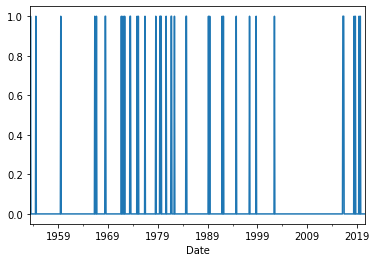

In [ ]:
Flood = df3['Calamity_Flood']
Flood.plot()

<AxesSubplot:xlabel='Date'>

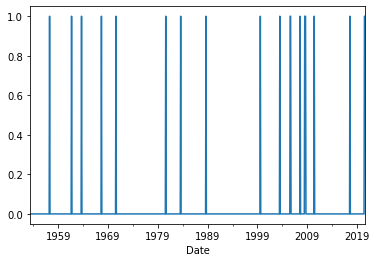

In [ ]:
Hurricane = df3['Calamity_Hurricane']
Hurricane.plot()

<AxesSubplot:xlabel='Date'>

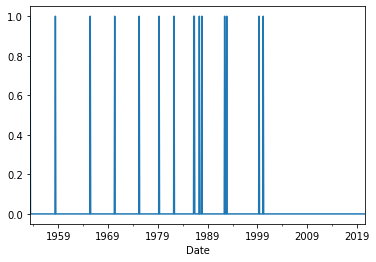

In [ ]:
Tornado = df3['Calamity_Tornado']
Tornado.plot()

In [ ]:
df3['x1'] = df3.index
Training_Dates = df3['x1']
Training_Dates.head()

Date
1953-05-31 00:00:00+00:00   1953-05-31 00:00:00+00:00
1953-06-30 00:00:00+00:00   1953-06-30 00:00:00+00:00
1953-07-31 00:00:00+00:00   1953-07-31 00:00:00+00:00
1953-08-31 00:00:00+00:00   1953-08-31 00:00:00+00:00
1953-09-30 00:00:00+00:00   1953-09-30 00:00:00+00:00
Freq: M, Name: x1, dtype: datetime64[ns, UTC]

In [ ]:
df3.drop(['x1'], axis = 1, inplace=True)
df3.head()

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado,Calamity_None
Date,,,,
1953-05-31 00:00:00+00:00,0,0,1,0
1953-06-30 00:00:00+00:00,1,0,0,0
1953-07-31 00:00:00+00:00,0,0,0,1
1953-08-31 00:00:00+00:00,0,0,0,1
1953-09-30 00:00:00+00:00,0,0,0,1


In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

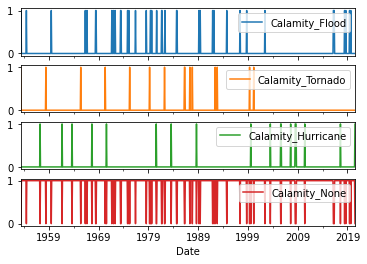

In [ ]:
df3[['Calamity_Flood', 'Calamity_Tornado','Calamity_Hurricane', 'Calamity_None']].plot(subplots=True)

In [ ]:
dataset = df3.values
dataset

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [ ]:
dataset = dataset.astype(float)
dataset

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

646 162


In [ ]:
train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=72):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 72
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(573, 72, 4)

In [ ]:
trainY.shape

(573, 4)

In [ ]:
trainY

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[2]))

In [ ]:
testX.shape

(89, 72, 4)

In [ ]:
import tensorflow as tf

In [ ]:
# creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, trainX.shape[2]), return_sequences = True))
model.add(LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras

In [ ]:
METRICS = [
   
      
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      
]

In [ ]:
"""pip install tensorflow-addons
import tensorflow_addons as tfa
fl = tfa.losses.SigmoidFocalCrossEntropy(alpha, gamma)
def focal_loss_custom(alpha, gamma):
   def binary_focal_loss(y_true, y_pred):
      fl = tfa.losses.SigmoidFocalCrossEntropy(alpha=alpha, gamma=gamma)
      y_true_K = K.ones_like(y_true)
      focal_loss = fl(y_true, y_pred)
      return focal_loss
   return binary_focal_loss

Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""from tensorflow_addons import focal_loss
from focal_loss import sparse_categorical_focal_loss

ImportError: cannot import name 'focal_loss' from 'tensorflow_addons' (/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tensorflow_addons/__init__.py)

In [ ]:
"""import tensorflow_addons as tfa
f2 = tfa.losses.SigmoidFocalCrossEntropy()

In [ ]:
"""pip install focal-loss
from focal_loss import SparseCategoricalFocalLoss

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install dill

     |████████████████████████████████| 86 kB 599 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras import backend as K

import dill

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed


if __name__ == '__main__':

    # Test serialization of nested functions
   

    cat_inner = dill.loads(dill.dumps(categorical_focal_loss(gamma=2., alpha=.25)))
    print(cat_inner)

<function categorical_focal_loss_fixed at 0x7f9706ce3700>


In [ ]:
model.compile(loss=[categorical_focal_loss(alpha=[[.29, .29, .29, .13]], gamma=2)], optimizer='adam', metrics = METRICS)

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=6, validation_split=0.1)

Epoch 1/50
86/86 [==============================] - 9s 58ms/step - loss: 0.0042 - accuracy: 0.9865 - precision: 0.9754 - recall: 0.9703 - val_loss: 0.0065 - val_accuracy: 0.9698 - val_precision: 0.9474 - val_recall: 0.9310
Epoch 2/50
86/86 [==============================] - 4s 45ms/step - loss: 0.0048 - accuracy: 0.9845 - precision: 0.9689 - recall: 0.9689 - val_loss: 0.0106 - val_accuracy: 0.9397 - val_precision: 0.8793 - val_recall: 0.8793
Epoch 3/50
86/86 [==============================] - 4s 45ms/step - loss: 0.0043 - accuracy: 0.9845 - precision: 0.9708 - recall: 0.9670 - val_loss: 0.0210 - val_accuracy: 0.9655 - val_precision: 0.9310 - val_recall: 0.9310
Epoch 4/50
86/86 [==============================] - 4s 46ms/step - loss: 0.0110 - accuracy: 0.9718 - precision: 0.9437 - recall: 0.9437 - val_loss: 0.0153 - val_accuracy: 0.9569 - val_precision: 0.9138 - val_recall: 0.9138

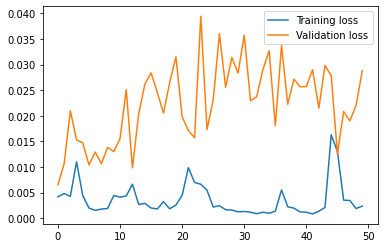

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Forecasting
#as inputs for prediction. We only have all 4 variables until the last day in our dataset.
n_future = 73
n_months_for_prediction=72  #let us predict past 72 months
train_dates = Training_Dates.values
forecast_period_dates = pd.date_range(list(train_dates)[-n_future], periods=n_months_for_prediction, freq='M').tolist()
print(forecast_period_dates)

[Timestamp('2014-08-31 00:00:00', freq='M'), Timestamp('2014-09-30 00:00:00', freq='M'), Timestamp('2014-10-31 00:00:00', freq='M'), Timestamp('2014-11-30 00:00:00', freq='M'), Timestamp('2014-12-31 00:00:00', freq='M'), Timestamp('2015-01-31 00:00:00', freq='M'), Timestamp('2015-02-28 00:00:00', freq='M'), Timestamp('2015-03-31 00:00:00', freq='M'), Timestamp('2015-04-30 00:00:00', freq='M'), Timestamp('2015-05-31 00:00:00', freq='M'), Timestamp('2015-06-30 00:00:00', freq='M'), Timestamp('2015-07-31 00:00:00', freq='M'), Timestamp('2015-08-31 00:00:00', freq='M'), Timestamp('2015-09-30 00:00:00', freq='M'), Timestamp('2015-10-31 00:00:00', freq='M'), Timestamp('2015-11-30 00:00:00', freq='M'), Timestamp('2015-12-31 00:00:00', freq='M'), Timestamp('2016-01-31 00:00:00', freq='M'), Timestamp('2016-02-29 00:00:00', freq='M'), Timestamp('2016-03-31 00:00:00', freq='M'), Timestamp('2016-04-30 00:00:00', freq='M'), Timestamp('2016-05-31 00:00:00', freq='M'), Timestamp('2016-06-30 00:00:00'

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

print(forecast_dates)

[datetime.date(2014, 8, 31), datetime.date(2014, 9, 30), datetime.date(2014, 10, 31), datetime.date(2014, 11, 30), datetime.date(2014, 12, 31), datetime.date(2015, 1, 31), datetime.date(2015, 2, 28), datetime.date(2015, 3, 31), datetime.date(2015, 4, 30), datetime.date(2015, 5, 31), datetime.date(2015, 6, 30), datetime.date(2015, 7, 31), datetime.date(2015, 8, 31), datetime.date(2015, 9, 30), datetime.date(2015, 10, 31), datetime.date(2015, 11, 30), datetime.date(2015, 12, 31), datetime.date(2016, 1, 31), datetime.date(2016, 2, 29), datetime.date(2016, 3, 31), datetime.date(2016, 4, 30), datetime.date(2016, 5, 31), datetime.date(2016, 6, 30), datetime.date(2016, 7, 31), datetime.date(2016, 8, 31), datetime.date(2016, 9, 30), datetime.date(2016, 10, 31), datetime.date(2016, 11, 30), datetime.date(2016, 12, 31), datetime.date(2017, 1, 31), datetime.date(2017, 2, 28), datetime.date(2017, 3, 31), datetime.date(2017, 4, 30), datetime.date(2017, 5, 31), datetime.date(2017, 6, 30), datetime.d

In [ ]:
#Make prediction
prediction = model.predict(trainX[-n_months_for_prediction:]) 

In [ ]:
prediction.shape
ypred = prediction

(72, 4)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict.shape

(573, 4)

In [ ]:
trainPredict

array([[1.24806808e-02, 2.35415518e-01, 9.47688892e-03, 7.42626905e-01],
       [2.74465024e-01, 1.04836136e-01, 1.70286745e-03, 6.18996024e-01],
       [7.95186460e-01, 5.10069402e-03, 1.06775784e-04, 1.99606135e-01],
       ...,
       [5.54442592e-02, 9.99366603e-05, 1.70057797e-06, 9.44454074e-01],
       [5.08764423e-02, 6.72445094e-05, 9.38913308e-06, 9.49046969e-01],
       [3.96474339e-02, 4.65536032e-05, 8.28483535e-05, 9.60223198e-01]],
      dtype=float32)

In [ ]:
np.argmax(trainPredict, axis=1)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
trainY

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
np.argmax(trainY, axis=1)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
np.argmax(testPredict, axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       3])

In [ ]:
np.argmax(testY, axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1])

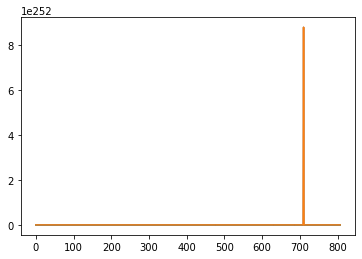

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot.astype(float)
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import math
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
# calculate root mean squared error
trainScore = math.sqrt(rmse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(rmse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.34 RMSE
Test Score: 0.56 RMSE


In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]